# SVM Practice Session
In this session, we will see how to use Support Vector Machines (SVM) to classify data. In a first time, we will work with generated data, and then we will use SVM to try and predict pulsars stars.

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer

## Data generation

In [2]:
# Set random seed for reproducibility
np.random.seed(42)

# We generate 1000 points, with 2 features, and 2 classes
# Let's pick a center for each class
center1 = np.array([0, 0])
center2 = np.array([1, 1])

# We generate 500 points around each center, distributed normally
data1 = np.random.normal(loc=center1, scale=(0.5, 0.3), size=(500, 2))
data2 = np.random.normal(loc=center2, scale=(0.3, 0.5), size=(500, 2))

# We create the labels
labels1 = np.zeros(500)
labels2 = np.ones(500)

# We concatenate the data and the labels
data1 = np.concatenate((data1, labels1.reshape(-1, 1)), axis=1)
data2 = np.concatenate((data2, labels2.reshape(-1, 1)), axis=1)

# We concatenate the two classes
data = np.concatenate((data1, data2), axis=0)

# We shuffle the data
np.random.shuffle(data)


# Split the data into features (X) and labels (y)
X = data[:, :-1]
y = data[:, -1]

# We split the data into train, and test sets (80% / 20 %)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a dataframe for visualization
df_train = pd.DataFrame(np.column_stack((X_train, y_train)), columns=["x", "y", "label"])
df_train["set"] = "train"
df_test = pd.DataFrame(np.column_stack((X_test, y_test)), columns=["x", "y", "label"])
df_test["set"] = "test"
df = pd.concat([df_train, df_test])

# Save the data
df.to_csv("synthetic_svm_data.csv", index=False)

In [3]:
data

array([[ 1.30721876,  1.29626347,  1.        ],
       [ 1.49837776,  0.77145187,  1.        ],
       [-0.80374162,  0.05539016,  0.        ],
       ...,
       [-0.01881735,  0.33099056,  0.        ],
       [ 0.70850298,  0.31019092,  1.        ],
       [ 0.78978607, -0.15685801,  0.        ]])

In [4]:
df

,x,y,label,set
0,1.459225,1.609381,1.0,train
1,-0.441929,0.046118,0.0,train
2,1.036689,1.271649,1.0,train
3,-0.134444,-0.331958,0.0,train
4,0.626841,0.653547,1.0,train
...,...,...,...,...
195,1.168276,0.852260,1.0,test
196,1.604016,1.068268,1.0,test
197,0.140496,-0.186810,0.0,test
198,1.060330,1.525327,1.0,test


Let's plot the data, to see what it looks like

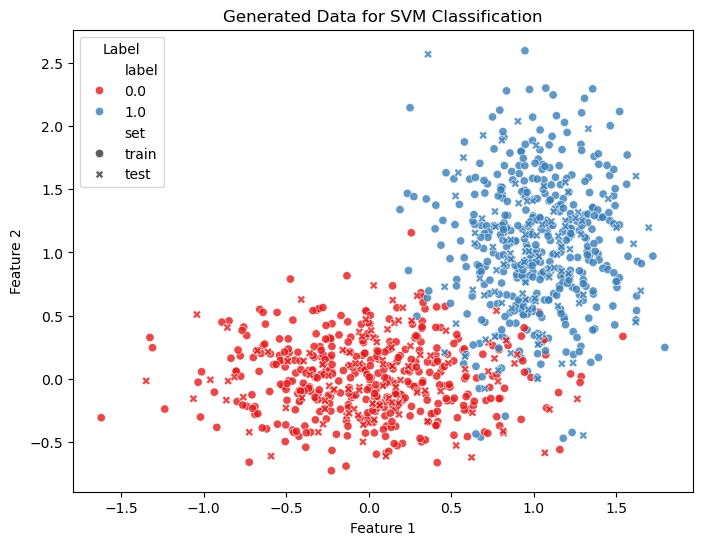

In [5]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="x", y="y", hue="label", style="set", palette="Set1", alpha=0.8)
plt.title("Generated Data for SVM Classification")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend(title="Label")
plt.show()

## SVM 

Note : use the GridSearchCV() function from sklearn to find the best hyperparameters for the SVM model.
In order to plot the results of the grid search, you may consider heatmaps.
Howerever, you may notice that we are concidering 3 hyperparameters, which makes it impossible to plot in a 2D space, and a 3D heatmap may be hard to read.
Hence, you may consider plotting only 2 hyperparameters at a time, and average over the third one !

To get the results from GridSearchCV, you may use `grid.cv_results_["mean_test_score"]` and `grid.cv_results_["params"]` to get the mean test score and the hyperparameters used for each fold.
A 'nice' way of getting a unified collection of the hyperparameters and their corresponding score would be a peice of code such as :
```python
d = []
i=0
for p in grid.cv_results_["params"]:
    d.append(p)
    d[-1]["result"] = grid.cv_results_["mean_test_score"][i]
    i += 1
print(d)
``` 

In [6]:
# We tune the hyperparameters : C, kernel, gamma
# We make a classifier
# We make a grid search using GridSearchCV()

# Note: the cross-validation behind GridSearchCV automatically splits the data into
# training and validation sets for each fold. It trains the model on the training set and
# evaluates its performance on the validation set. This process is repeated for each fold,
# and the average performance is used to assess the model's generalization ability.
# GridSearchCV exhaustively tests all possible combinations of hyperparameters specified
# in the hyperparams dictionary, and selects the combination that gives the best average
# performance across all folds. This helps in finding the optimal hyperparameters for the
# Support Vector Machine model without manually trying each combination.


# We train it
# We plot the accuracy as a function of the hyper parameters. Thinks of a 'smart' way of plotting it.
# We print the best hyperparameters
# We select the best model and print the accuracy on the test set


In [5]:
# SVM with GridSearchCV
# We tune the hyperparameters : C, kernel, gamma
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear', 'rbf', 'poly']
}

svm_model = SVC()
grid = GridSearchCV(svm_model, param_grid, cv=5, verbose=2, n_jobs=-1)
grid.fit(X_train, y_train)

# Extract and organize results
d = []
i = 0
for p in grid.cv_results_["params"]:
    d.append(p)
    d[-1]["result"] = grid.cv_results_["mean_test_score"][i]
    i += 1

print(d)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[{'C': 0.1, 'gamma': 1, 'kernel': 'linear', 'result': 0.95875}, {'C': 0.1, 'gamma': 1, 'kernel': 'rbf', 'result': 0.96}, {'C': 0.1, 'gamma': 1, 'kernel': 'poly', 'result': 0.9487500000000001}, {'C': 0.1, 'gamma': 0.1, 'kernel': 'linear', 'result': 0.95875}, {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf', 'result': 0.9600000000000002}, {'C': 0.1, 'gamma': 0.1, 'kernel': 'poly', 'result': 0.63125}, {'C': 0.1, 'gamma': 0.01, 'kernel': 'linear', 'result': 0.95875}, {'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf', 'result': 0.96}, {'C': 0.1, 'gamma': 0.01, 'kernel': 'poly', 'result': 0.505}, {'C': 0.1, 'gamma': 0.001, 'kernel': 'linear', 'result': 0.95875}, {'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf', 'result': 0.505}, {'C': 0.1, 'gamma': 0.001, 'kernel': 'poly', 'result': 0.505}, {'C': 1, 'gamma': 1, 'kernel': 'linear', 'result': 0.96}, {'C': 1, 'gamma': 1, 'kernel': 'rbf', 'result': 0.96}, {'C': 1, 'gamma': 1, 'kernel': 'poly', 'result': 0.

In [6]:
# We train it
best_model = grid.best_estimator_

# We print the best hyperparameters
print("Best Hyperparameters:", grid.best_params_)

# We select the best model and print the accuracy on the test set
y_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)

Best Hyperparameters: {'C': 1, 'gamma': 0.001, 'kernel': 'rbf', 'result': 0.96125}
Test Accuracy: 0.94


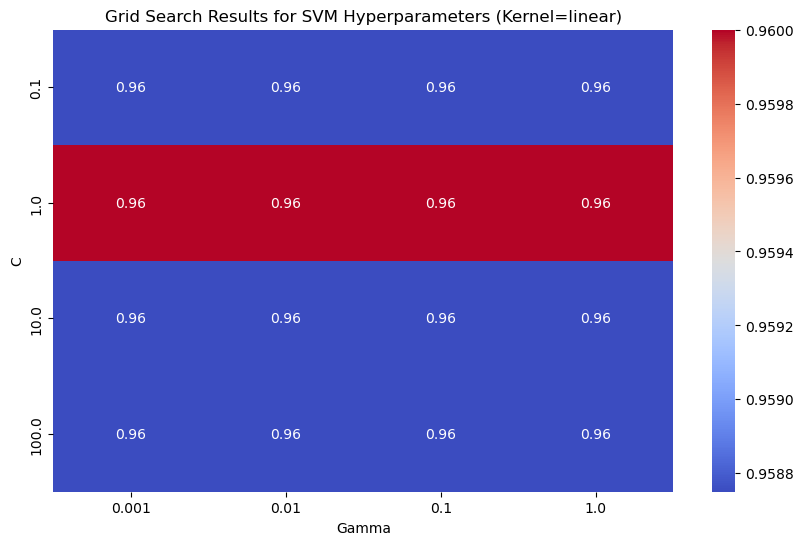

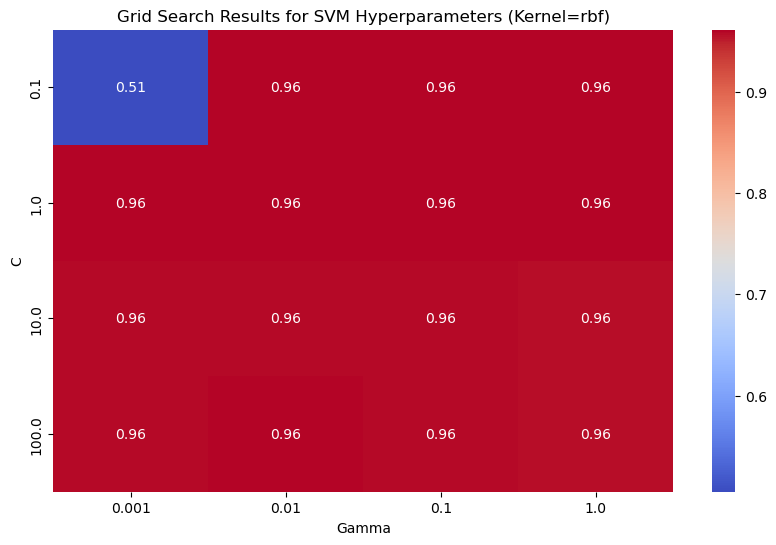

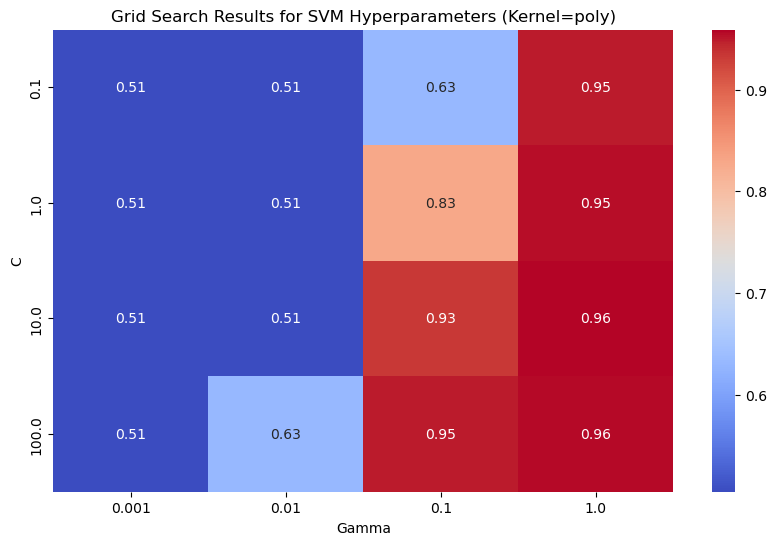

In [7]:

# Convert results to DataFrame
results_df = pd.DataFrame(d)

# Plot heatmaps for two hyperparameters at a time, averaging over the third
for kernel in ['linear', 'rbf', 'poly']:
    subset = results_df[results_df['kernel'] == kernel]
    subset_numeric = subset[['C', 'gamma', 'result']].groupby(['C', 'gamma']).mean().reset_index()
    pivot_table = subset_numeric.pivot(index='C', columns='gamma', values='result')
    plt.figure(figsize=(10, 6))
    sns.heatmap(pivot_table, annot=True, cmap='coolwarm')
    plt.title(f"Grid Search Results for SVM Hyperparameters (Kernel={kernel})")
    plt.xlabel("Gamma")
    plt.ylabel("C")
    plt.show()


## We can also plot the decision boundary

For better insight, we plot the decision boundary of the classifier with the hyperparameters : (C=1, kernel="linear"), (C=1, kernel="rbf"), (C=100, kernel="linear"), (C=100, kernel="rbf")

In [15]:
# models = {1: {'C': 1, 'kernel': 'linear'},
#           2: {'C': 1, 'kernel': 'rbf'},
#           3: {'C': 100, 'kernel': 'linear'},
#           4: {'C': 100, 'kernel': 'rbf'}}
# # We make the classifiers
# # We train them
# # We get the accuracy on the test set


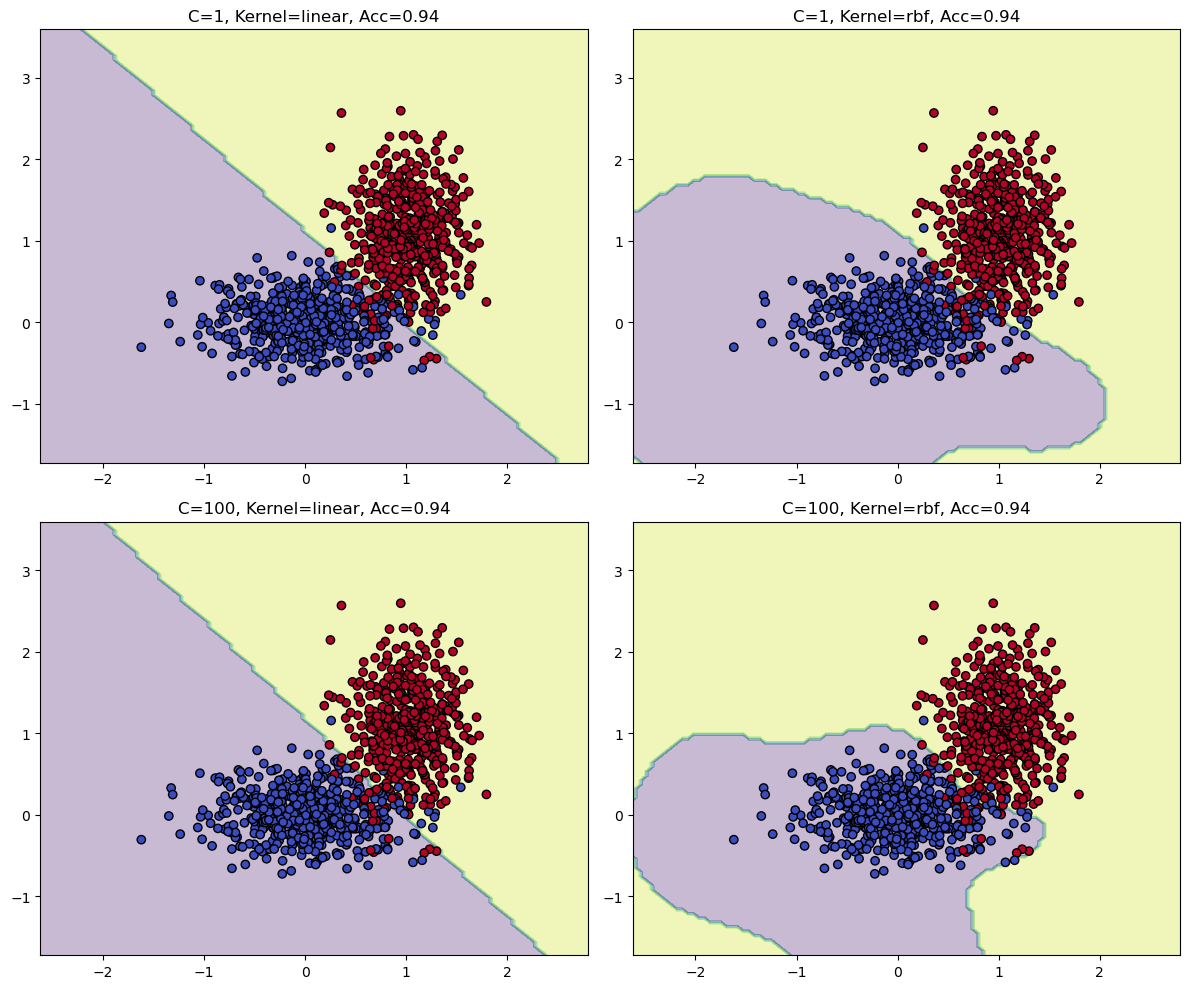

In [8]:
models = {1: {'C': 1, 'kernel': 'linear'},
          2: {'C': 1, 'kernel': 'rbf'},
          3: {'C': 100, 'kernel': 'linear'},
          4: {'C': 100, 'kernel': 'rbf'}}

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

for i, (key, params) in enumerate(models.items()):
    model = SVC(C=params['C'], kernel=params['kernel'])
    model.fit(X_train, y_train)
    
    # Get accuracy
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    
    # Plot decision boundary
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    axes[i].contourf(xx, yy, Z, alpha=0.3)
    axes[i].scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap='coolwarm')
    axes[i].set_title(f"C={params['C']}, Kernel={params['kernel']}, Acc={acc:.2f}")

plt.tight_layout()
plt.show()

Note : In order to predict the full space xx, yy, you will need to use something as 
```python
model.predict(np.c_[xx.ravel(), yy.ravel()])
```
Please, note the use of `np.c_` to concatenate the two arrays, and the use of `ravel()` to flatten the arrays.

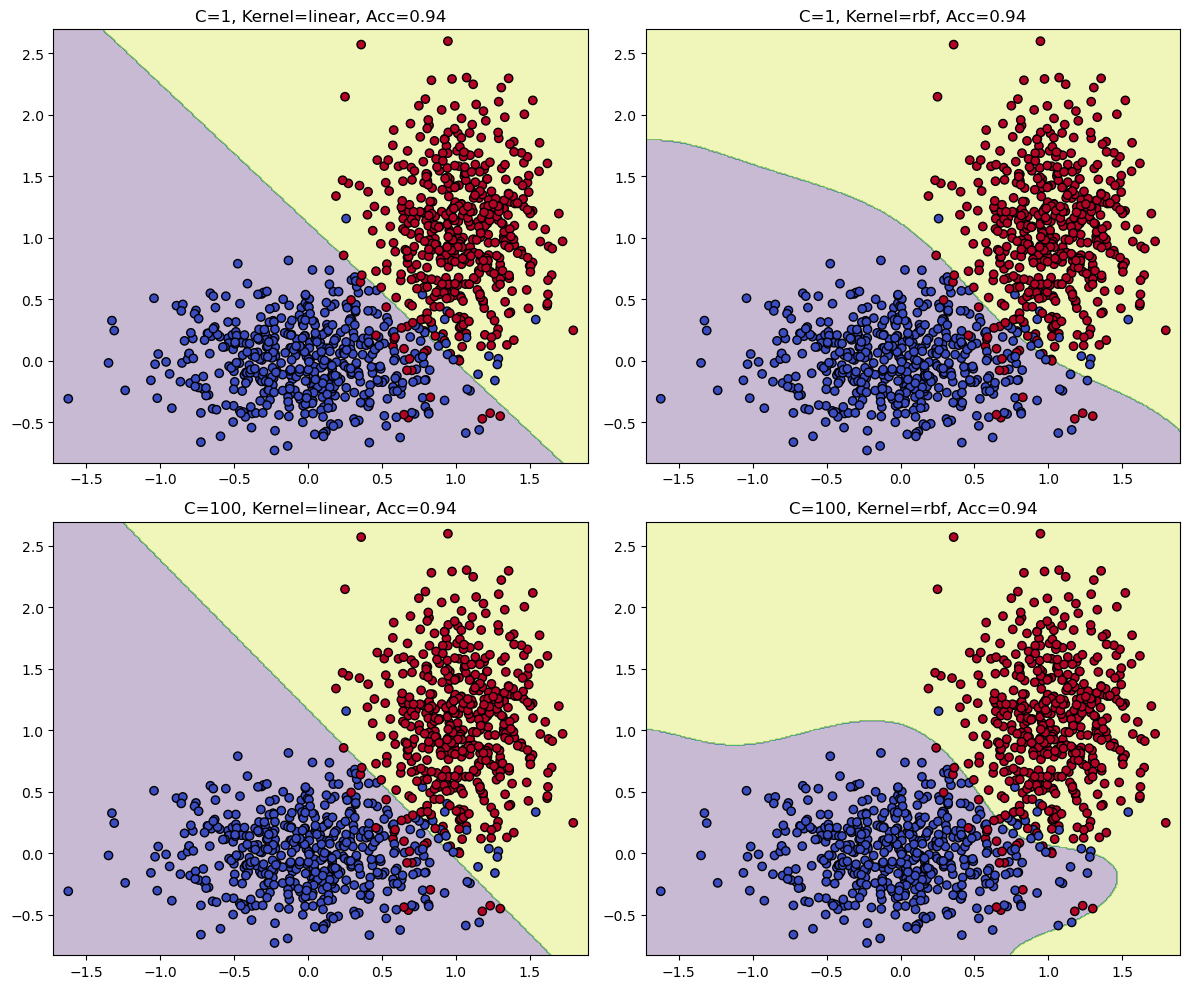

In [9]:
# We create a grid of points
x_min, x_max = data[:, 0].min() - 0.1, data[:, 0].max() + 0.1
y_min, y_max = data[:, 1].min() - 0.1, data[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# We plot the decision boundary for each classifier and print the accuracy on the test set
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

for i, (key, params) in enumerate(models.items()):
    model = SVC(C=params['C'], kernel=params['kernel'])
    model.fit(X_train, y_train)
    
    # Get accuracy
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    
    # Predict full space
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # Plot decision boundary
    axes[i].contourf(xx, yy, Z, alpha=0.3)
    axes[i].scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap='coolwarm')
    axes[i].set_title(f"C={params['C']}, Kernel={params['kernel']}, Acc={acc:.2f}")

plt.tight_layout()
plt.show()


## Real data - Pulsar stars

Apply the same procedure as in the previous section to find the best parameters for the pulsar dataset using cross-fold validation. The data is to be found with along to this notebook. The files are :
- pulsar_data_train.csv on which you must perform the training and validation
- pulsar_data_test.csv on which you must test your model.
The interest of having a separate 'test' file is that everybody can eveluate their model equialy. 
Competitions websites such as Kaggle keep there test dataset private to evaluate all participants' models on the same secrete data !

### Description

Pulsars are a rare type of Neutron star that produce radio emission detectable here on Earth. They are of considerable scientific interest as probes of space-time, the interstellar medium, and states of matter. Machine learning tools are now being used to automatically label pulsar candidates to facilitate rapid analysis. In particular, classification systems are widely adopted, which treat the candidate datasets as binary classification problems.

### Heandling missing values

Somes values of the features are missing. You can use the `SimpleImputer` from `sklearn.impute` to fill the missing values. Or any other method you prefer.

You can load the data into a dataframe using the below code snippet:

```python
import pandas as pd
input_file = "pulsar_data_train.csv"
df = pd.read_csv(input_file)
```

### More information

Refer to the project's instructions for more information on this part.

In [10]:
# TODO : Here you go ! Good luck ! :)

input_file = "pulsar_data_train.csv"
train_df= pd.read_csv(input_file)

test_df = pd.read_csv("pulsar_data_test.csv")

In [11]:
train_df

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0
...,...,...,...,...,...,...,...,...,...
12523,124.312500,53.179053,-0.012418,-0.556021,7.186455,29.308266,4.531382,21.725143,0.0
12524,115.617188,46.784600,0.218177,0.226757,6.140468,NaN,5.732201,34.357283,0.0
12525,116.031250,43.213846,0.663456,0.433088,0.785117,11.628149,17.055215,312.204325,0.0
12526,135.664062,49.933749,-0.089940,-0.226726,3.859532,21.501505,7.398395,62.334018,0.0


In [12]:
test_df

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,116.906250,48.920605,0.186046,-0.129815,3.037625,17.737102,8.122621,78.813405,NaN
1,75.585938,34.386254,2.025498,8.652913,3.765050,21.897049,7.048189,55.878791,NaN
2,103.273438,46.996628,0.504295,0.821088,2.244983,15.622566,9.330498,105.134941,NaN
3,101.078125,48.587487,1.011427,1.151870,81.887960,81.464136,0.485105,-1.117904,NaN
4,113.226562,48.608804,0.291538,0.292120,6.291806,26.585056,4.540138,21.708268,NaN
...,...,...,...,...,...,...,...,...,...
5365,116.531250,51.140269,-0.001220,-0.184189,4.510870,26.599514,6.634989,45.362390,NaN
5366,114.976562,53.783052,0.377599,-0.155708,2.772575,20.838488,8.440796,77.355028,NaN
5367,136.171875,48.924385,NaN,0.063227,2.810201,18.695230,7.848577,69.388978,NaN
5368,106.500000,49.066122,0.245742,0.140377,2.331104,15.417568,9.008041,100.367616,NaN


#### Check for null values

In [13]:
train_df.isna().sum()

 Mean of the integrated profile                     0
 Standard deviation of the integrated profile       0
 Excess kurtosis of the integrated profile       1735
 Skewness of the integrated profile                 0
 Mean of the DM-SNR curve                           0
 Standard deviation of the DM-SNR curve          1178
 Excess kurtosis of the DM-SNR curve                0
 Skewness of the DM-SNR curve                     625
target_class                                        0
dtype: int64

In [14]:
test_df.isna().sum()

 Mean of the integrated profile                     0
 Standard deviation of the integrated profile       0
 Excess kurtosis of the integrated profile        767
 Skewness of the integrated profile                 0
 Mean of the DM-SNR curve                           0
 Standard deviation of the DM-SNR curve           524
 Excess kurtosis of the DM-SNR curve                0
 Skewness of the DM-SNR curve                     244
target_class                                     5370
dtype: int64

### Separate features and labels

In [15]:
X_train = train_df.iloc[:, :-1]
y_train = train_df.iloc[:, -1]
X_test = test_df.iloc[:, :-1]
y_test = test_df.iloc[:, -1]

In [16]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((12528, 8), (12528,), (5370, 8), (5370,))

In [17]:
X_train.isnull().sum()

Mean of the integrated profile                     0
Standard deviation of the integrated profile       0
Excess kurtosis of the integrated profile       1735
Skewness of the integrated profile                 0
Mean of the DM-SNR curve                           0
Standard deviation of the DM-SNR curve          1178
Excess kurtosis of the DM-SNR curve                0
Skewness of the DM-SNR curve                     625
dtype: int64

In [18]:
X_test.isnull().sum()

Mean of the integrated profile                    0
Standard deviation of the integrated profile      0
Excess kurtosis of the integrated profile       767
Skewness of the integrated profile                0
Mean of the DM-SNR curve                          0
Standard deviation of the DM-SNR curve          524
Excess kurtosis of the DM-SNR curve               0
Skewness of the DM-SNR curve                    244
dtype: int64

### Handle Missing Values

In [19]:
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

### We tune the hyperparameters : C, kernel, gamma

In [20]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear', 'rbf']
}
# We make a classifier
svm_model = SVC()

### GridSearchCV

In [21]:
grid = GridSearchCV(svm_model, param_grid, cv=5, verbose=2, n_jobs=-1)
grid.fit(X_train, y_train)

# We train it
best_model = grid.best_estimator_

# We print the best hyperparameters
print("Best Hyperparameters:", grid.best_params_)



Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best Hyperparameters: {'C': 10, 'gamma': 1, 'kernel': 'linear'}


In [22]:
best_model

SVC(C=10, gamma=1, kernel='linear')

In [ ]:
y_pred = best_model.predict(X_test)


In [24]:
y_pred

array([0., 1., 0., ..., 0., 0., 0.])

In [27]:
y_test = y_pred
test_df["target_class"] = y_test

In [28]:
test_df.to_csv("pulsar_data_test_predicted.csv", index=False)